# Linear Regression: Boston House Price Prediction

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.

### Tools
- We will use sklearn and statsmodel

**Importing Libraries**

In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


###Load the dataset

In [38]:
df = pd.read_csv("/Users/adityaagarwal/Library/CloudStorage/OneDrive-NortheasternUniversity/Jupyter Notebook/Resume Projects/Boston Housing Price Prediction/data/Boston.csv",
                sep = ',')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Check the shape of the dataset**

In [39]:
df.shape

(506, 14)

**Get the info data types column wise**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 1. Check missing values

In [41]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### 2. Figuring out the statistical Summary of all the numerical columns.

In [42]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Insights:**

Highly skewed columns are mentioned here.

Left skewed(mean < median): Age

Right skewed(mean > median): CRIM, ZN, INDUS, RAD, TAX


### 3. Visualising the features at hand

- Constructing a pairplot for all the features using 'kde' type for the diagonal.
- Providing insights from the plots

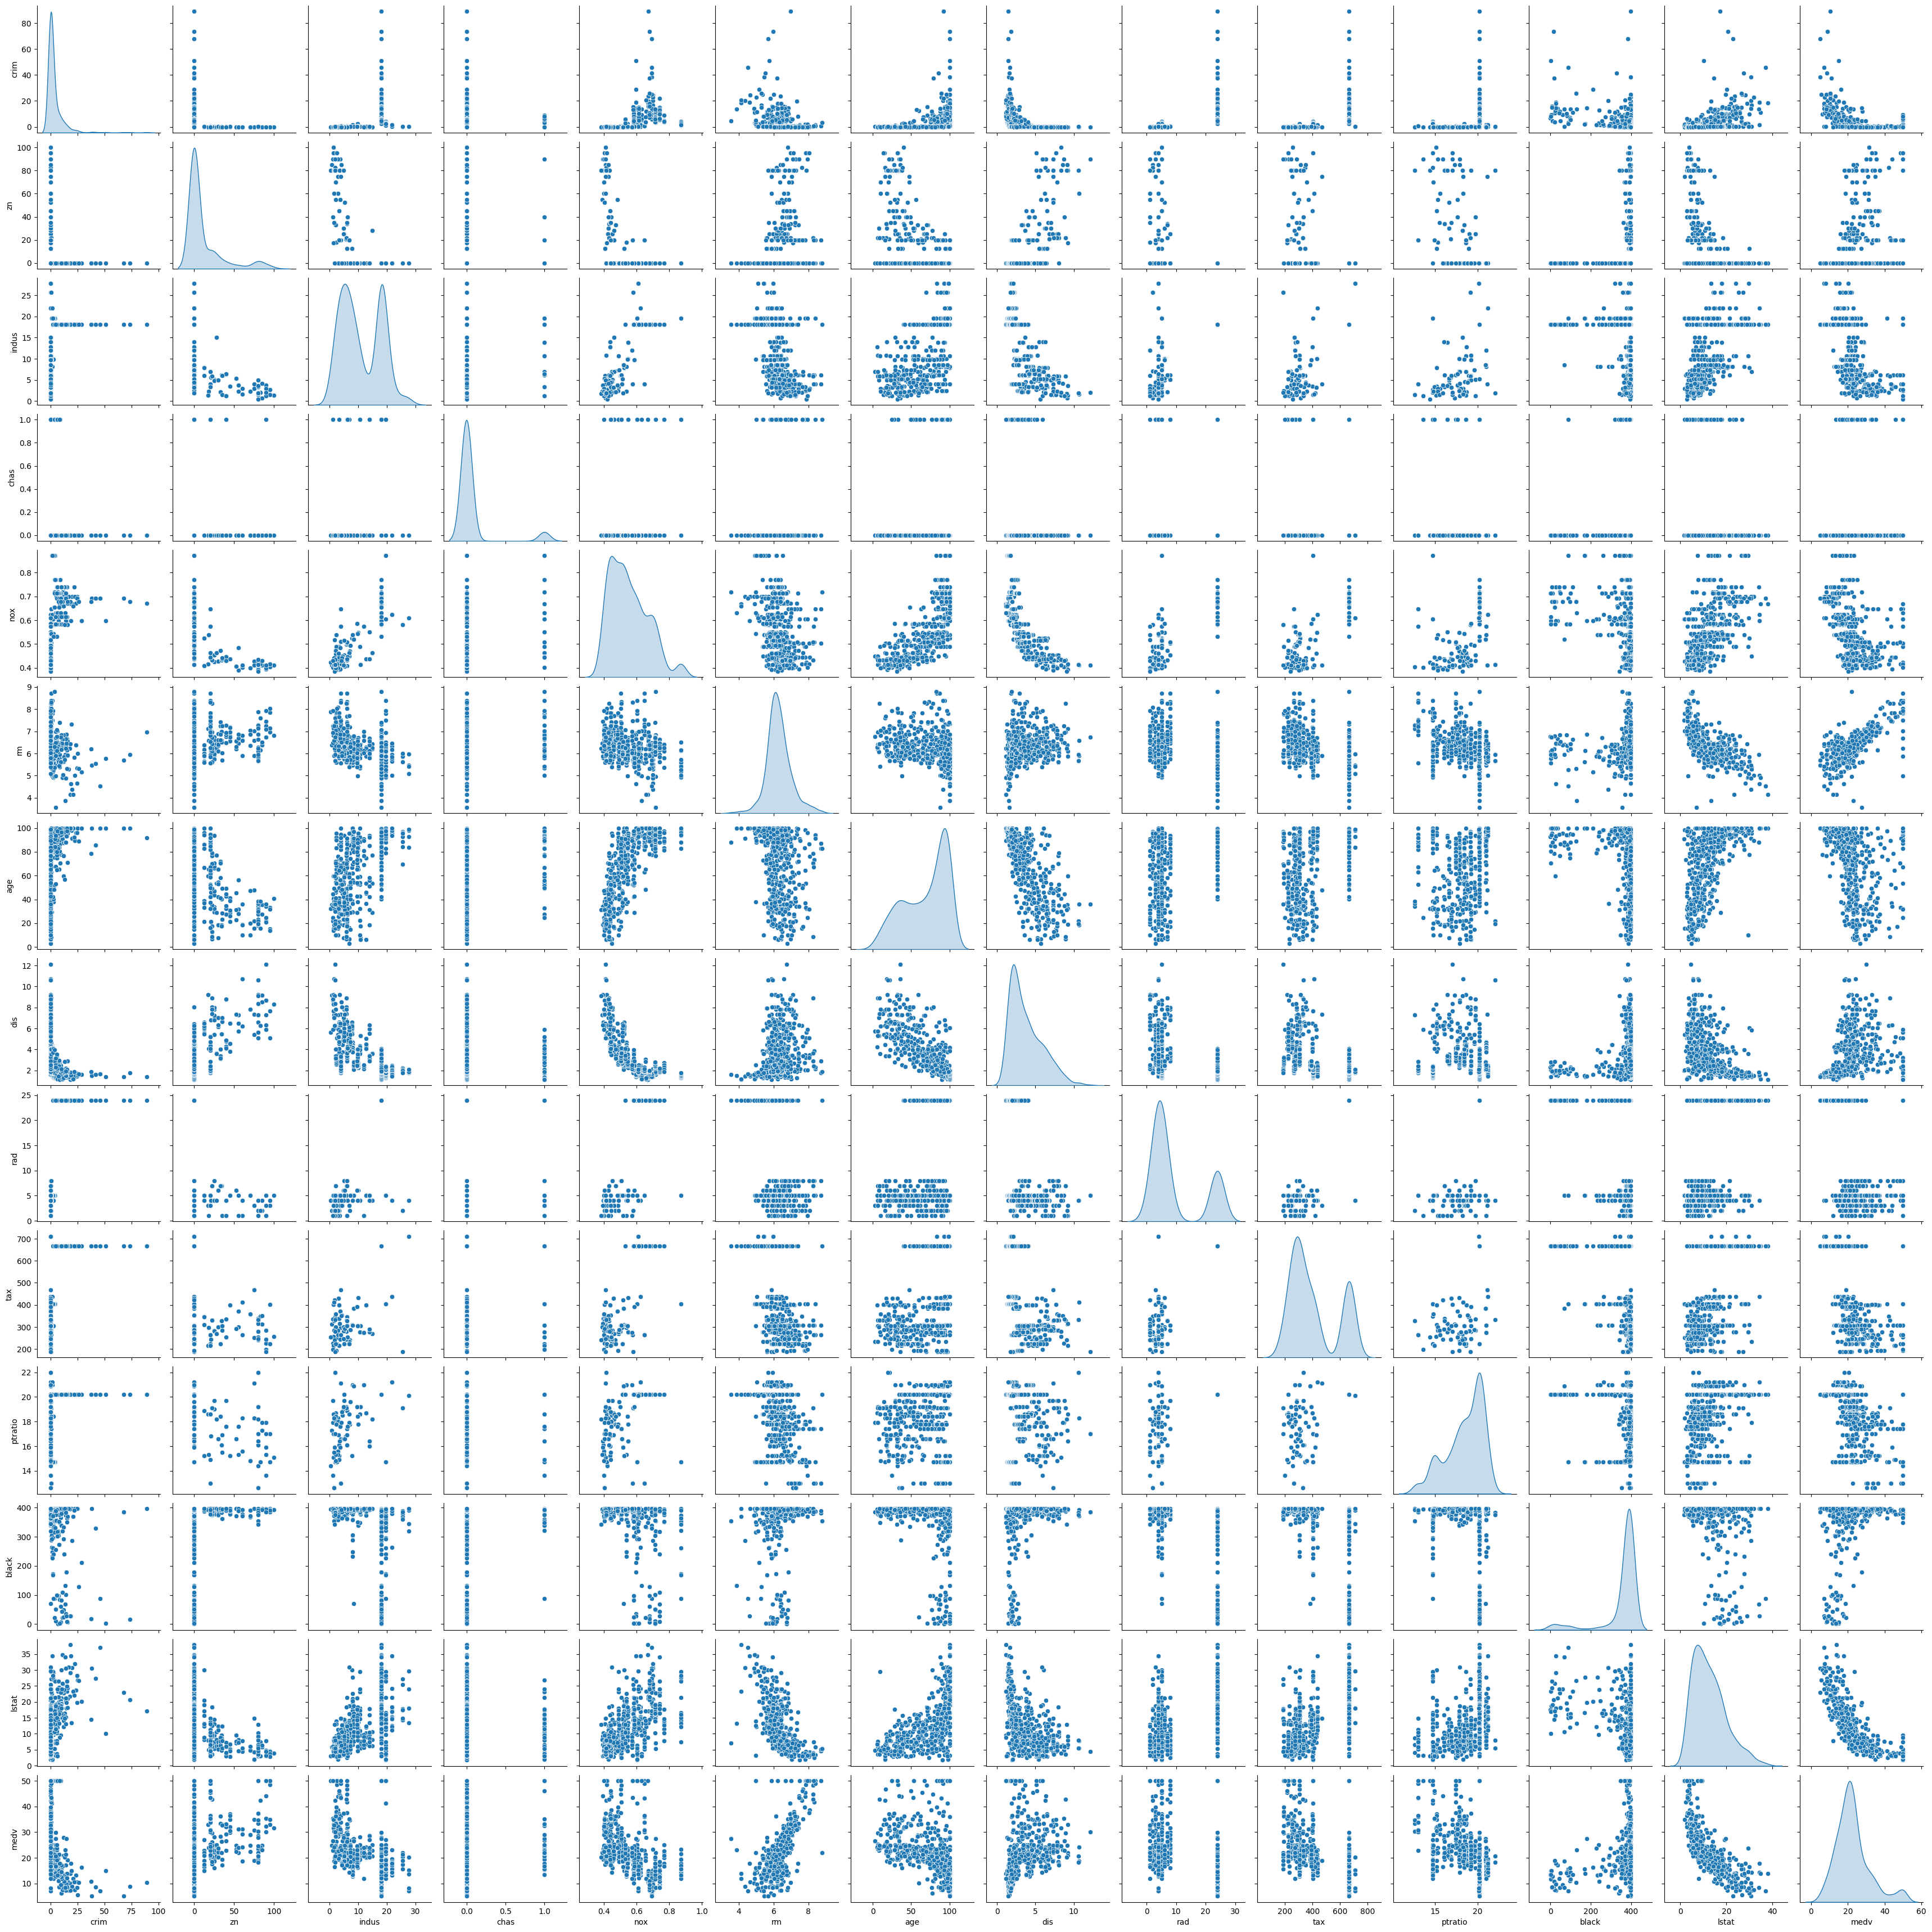

In [43]:
#pairplot
sns.pairplot(df, diag_kind='kde')

**Insights -**

Places with the low Crime rate, larger residential land zoned, nitric oxides concentration, distances to five Boston employment centres and %lower status of the population are likely to have the higher housing price. Parameters RAD and TAX have larger results for the smaller value and vice versa.

### 4. Get the Correlation Heatmap and highlight correlation values.
- Drawing the correlation plot with cmap = 'Oranges'
- Highlighting all the correlations above 0.7 
- Observing the correlation value between DIS and NOX and comment on the same.



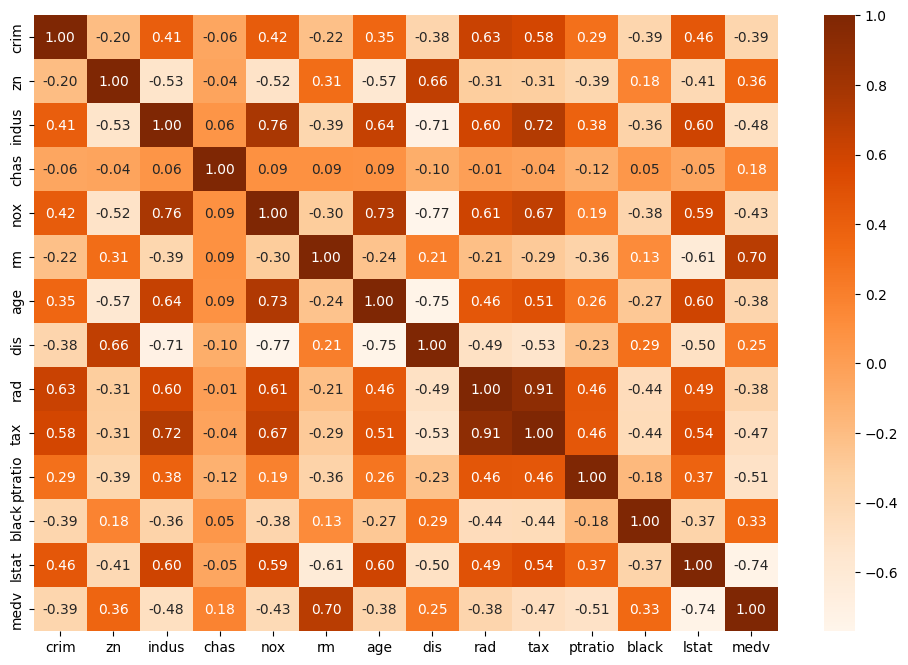

In [44]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Oranges' )
plt.show()

**Comments**

Parameters DIS and NOX are inversely but highly correlated. This says that if people with higher TAX value lives near the 'Five Boston Employment Centers(Lower DIS).

### 5.  Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [45]:
Y = df['medv']
X = df.drop(columns = {'medv'})

In [46]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=1)

### 6. Scale the features
- Train the scaler on the train data and use it to transfrom the train and the test data.




In [47]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

X_test = ss.fit_transform(X_test)

X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

### 7. Modelling

#### 7.1 With all the features

- Use all the features and report the mean of mean_squared_error for the 5 fold validation set.




In [48]:
# Intialising the model and fit the model on the train data
# Let us use the Kfold cross validation with k = 10

from sklearn.model_selection import cross_val_score

lr = LinearRegression()

lr_cv_scores_mse = cross_val_score(lr, X_train, y_train, cv = 5, scoring='r2')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print(" Average MeanSquared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[0.49928471 0.79566051 0.60481958 0.71988078 0.70189495]
 Average MeanSquared Error: -0.664 (+/- 0.205)


In [49]:
# Intialising the model and fit the model on the train data
# Let us use the Kfold cross validation with k = 10

from sklearn.model_selection import cross_val_score

lr = LinearRegression()

lr_cv_scores_mse = cross_val_score(lr, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print(" Average MeanSquared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[-34.12809475 -17.98990088 -27.47132784 -28.45214047 -22.01184618]
 Average MeanSquared Error: 26.011 (+/- 11.111)


#### 7.2 Use vif scores to iteratively remove the features with vif values > 5 and report the cross validation Average Mean_Squared_Error at each iteration.

- Dropping the features in an iterative fashion for features With  VIF scores > 5
- Running cross validation with 5 fold to report the average mean_squared_error 

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

crim        1.993439
zn          2.743911
indus       4.004462
chas        1.078490
nox         4.430555
rm          1.879494
age         3.155351
dis         4.361514
rad         8.369185
tax        10.194047
ptratio     1.948555
black       1.385213
lstat       2.926462
dtype: float64



**Lets drop the feature TAX**

In [51]:
# Drop the feature and report the average mean_squared_Error metric with Kfold cross validation, k = 5

X_train2 = X_train.drop(columns = ['tax'])

lr = LinearRegression()

lr_cv_scores_mse = cross_val_score(lr, X_train2, y_train, cv = 5, scoring='neg_mean_squared_error')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print()
print(" Average MeanSquared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[-34.53110783 -18.35157455 -28.1288507  -28.74554932 -22.37352667]

 Average MeanSquared Error: 26.426 (+/- 11.157)


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)

print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

crim       1.992236
zn         2.483521
indus      3.277778
chas       1.052841
nox        4.397232
rm         1.876243
age        3.154114
dis        4.339453
rad        2.978247
ptratio    1.914523
black      1.384927
lstat      2.924524
dtype: float64



**All vif scores under 5**

#### 7.3 Use the best model out of all the ones tried before(based on the least average mean_squared error on the validation set obtained through cross_val_Score)and report the test data metrics

- Fit the model for the training data all over again
- Save the test predictions from the model
- Print the train and the test Rsquared

In [53]:
# Using the X_train as it has the least average MSE value

X_test = X_test[X_train.columns]

lr = LinearRegression()

lr.fit(X_train, y_train)
test_pred = lr.predict(X_test)

print("Train Rsquared:", lr.score(X_train, y_train))
print("Test R squared:", lr.score(X_test, y_test))

Train Rsquared: 0.7103879080674731
Test R squared: 0.7815872322862851


#### 7.4 Write a function that takes the prediction and the actuals as numpy arrays and returns the RMSE.

- Print the RMSE for the train and the test set using the function RMSE

In [54]:
from math import sqrt

def RMSE(actual, prediction):
    #Return the RMSE#
    rms = sqrt(mean_squared_error(actual, prediction))
    return rms

In [55]:
testRMSE= RMSE(y_test, test_pred)

trainRMSE = RMSE(y_train, lr.predict(X_train))

In [56]:
testRMSE, trainRMSE

(4.474204979802025, 4.849055005805464)

#### 7.5 Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs.

In [57]:
a = lr.coef_
coeff_data = pd.DataFrame(list(X_train.columns)).copy()

coeff_data.insert(len(coeff_data.columns),"Coefs",a.transpose())
coeff_data.columns = ['Feature', 'Coefs']
coeff_data.at[12] = ['Intercept',lr.intercept_]
coeff_data

,Feature,Coefs
0,crim,-0.838843
1,zn,1.428401
2,indus,0.405327
3,chas,0.679425
4,nox,-2.530391
5,rm,1.933816
6,age,0.100907
7,dis,-3.236154
8,rad,2.703183
9,tax,-1.917299


In [58]:
# Let us write the equation of the fit
Equation = "Price ="
print(Equation, end='\t')
for i in range(0, 13):
    if(i!=12):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(coeff_data.iloc[i].Coefs)

Price =	( -0.8388427090088966 ) * crim +  ( 1.4284006502399835 ) * zn +  ( 0.405326506252498 ) * indus +  ( 0.6794247325458296 ) * chas +  ( -2.5303912431957256 ) * nox +  ( 1.9338164291403137 ) * rm +  ( 0.10090715378745285 ) * age +  ( -3.236154175453879 ) * dis +  ( 2.7031830603279268 ) * rad +  ( -1.917298957471889 ) * tax +  ( -2.1557862070871137 ) * ptratio +  ( 0.5822764851036529 ) * black +  22.33983050847458
